# Scalar field Z

In [1]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z


## Definition of variables

In [2]:
radius = 3 * mm

xin = np.linspace(-radius, radius, 4096)
xout = np.linspace(-150 * um, 150 * um, 128)

wavelength = 550 * nm

focal = 250 * mm
z = focal


In [3]:
t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal, radius=radius)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0


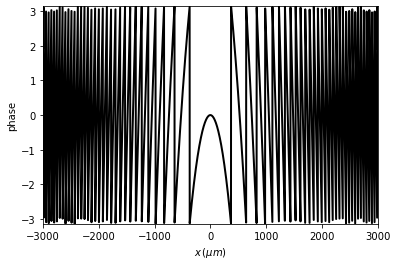

In [4]:
u1.draw('phase')


In [5]:
print(u1)


Scalar_field_X
 - x:  (4096,),   u:  (4096,)
 - xmin:       -3000.00 um,  xmax:      3000.00 um,  Dx:   1.47 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.70 deg, phase_max: 180.00 deg
 - wavelength: 0.55 um
 - date:       2023-10-07_17_30_14



## CZT algorithm

In [6]:
%%time
zs = np.linspace(focal - 50 * mm, focal + 50 * mm, 1024)
u_z = u1.CZT(zs,0,0)


CPU times: user 3.3 s, sys: 219 µs, total: 3.3 s
Wall time: 3.31 s


In [7]:
print(u_z)

Scalar_field_Z
 - z:  (1024,),   u:  (1024, 1)
 - zmin:       200000.00 um,  zmax:      300000.00 um,  Dz:   97.75 um
 - Imin:       4.36,     Imax:      261.70
 - phase_min:  -179.73 deg, phase_max: 179.85 deg
 - wavelength: 0.55 um
 - date:       2023-10-07_17_30_18



## Scalar z

DOF = 6.64 mm


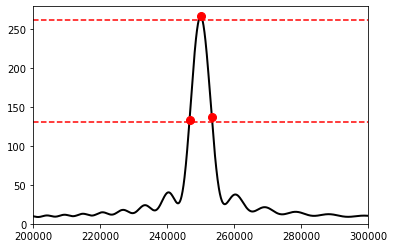

In [8]:
dof = u_z.DOF(percentage=0.5, remove_background=True, has_draw=True)
print("DOF = {:2.2f} mm".format(dof / mm))


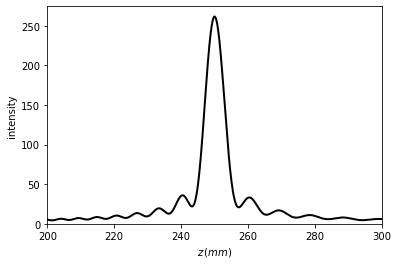

In [9]:
u_z.draw(z_scale='mm')


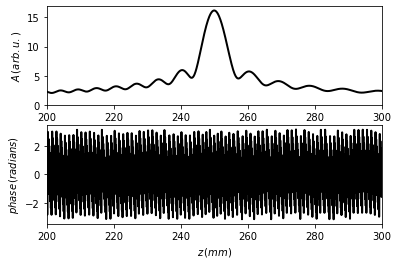

In [10]:
u_z.draw('field', z_scale='mm')
